# **Capstone Project -** **Play Store App Review Analysis**

## **Preliminary Steps**

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
## Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset-1
df_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv")
df_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## **Reading and Data Wrangling Tasks Dataset-1 - Play Store Data**

In [ ]:
## Creating a copy of original dataset
df = df_1.copy()

In [ ]:
## Identifying columns which are imp and which are not
## 1. Droping columns = "Android Ver" , "Current Ver" , "Last Updated" since not important
## 2. Droping column = "Genres" since columns "Genres" and "Category" are same
df.drop(['Last Updated' , 'Current Ver' , 'Android Ver' , 'Genres'] , inplace = True , axis = 1)

In [ ]:
## Necessary Checks
print(df.shape)
print(df.isnull().sum())
print(df.info())
print(df.dtypes)
print(df.describe())

(10841, 9)
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB
None
App                object
Category           object
Rating            float64
Reviews            object
Siz

In [ ]:
## Total obsevations = (10841, 10)
## Null values = "Rating" = 1474 , ("Type" , "Content Rating") = (1 , 1)
## dtypes = "Rating" = "float64" others = "object"
## describe = "Rating" = (count,9367) (mean,4.19) (min,1) (max,19)

## "Reviews" , "Installs" , "Price" columns should be int64 , "Size" may be int64 lets see
## "Content Rating" column name should be changed to "Age Rating" as it is confusing me with App Ratings
## "Rating" column name should be change to "App Rating"
## "Genres" column position should be beside "App" column

# Individual wise column Data Wrangling(Cleaning)

## App column:
'''
1. Values datatype = string , use .strip()
2. No Nulls but have to check for " " empty strings = No " "/"" empty string or space
3. Check for unique values , whether all 10841 apps are different or same if same combine those rows with their mean and remove rest
4. It is a categorical column may be with all unique values
5. Some value in App column were repeated and only Reviews values were varying in those rows , hence combined all those repeated values and extracted max corresponding review value and stored resultant dataframe in result_df
6. shape reduced to 9660 from 10841

STATUS = DONE
'''
## Rating column:
'''
1. Values datatype = float64
2. Nulls = 1474 therefore these cells must be NaN/None values , lets see what can be done to those
   1. Cannot drop these many rows
   2. Cannot fill with mean in these many rows as these will affect the outcome of analysis greatly as these will be noise not actual data
   3. Therefore only option is to do analysis by not considering these columns while plotting graph
   4. Another thing can be done use groupby for bivariate analysis and check which group can be affected greatly by dropping those null rows
3. Check for max rating whether limit is 5 or greater = Find range of ratings
   1. one thing noticed that Rating column has max value = 19 which will not make sense if rating values limit is 5 or less than 19 hence replace with max limit
4. It is a Numerical Column
5. Only one anomaly which is a max value of 19 was given , in this row problem was that all the values were shifted to elft , hence filled with correct value = 2.9
6. 15..% null values

STATUS = DONE - only left to fill null values or not fill
'''

## Reviews column:
'''
1. Value datatype = object meaning string , but it should be int64 , hence some string input is there hence filter out those using isaplha() and == " " and replace with NaN values then convert to int64
2. It is a Numerical column
3. Found only one value in this column containing alphabets (3.0M) hence replaced it with correct value =  and then converted values to int64 type
4. No null values

STATUS = DONE
'''

## Size column:
'''
1. Values datatype = string , use .strip()
2. I don't think this column can be converted to Numnerical column as Size can be in MB , kB , GB but can be converted to numerical if any one unit is set as standard
3. Check for " " empty strings and replce with NaN values = No space or empty string
4. It is a categorical but can be converted to a Numerical column if number of GB are very less then use MB as standard
5. No GB size avalilable only k and M sizes hence can consider to take M as standard

STATUS = DONE - only left to set standard and convert to float64
'''

## Installs column:
'''
1. Value datatype = string , use .strip()
2. convert to int64 by using .strip("+") = done and removed , and then converted values to float64 type
3. check for " " empty stringand replace it with NaN values = No empty string or space string
4. It is a Numerical column
5. incorrect value replaced with correct value = 1000+

STATUS = DONE
'''
## Type column:
'''
1. Value datatype = string , use .strip()
2. Analysis based on unique values , unique values = "Free" , "Paid" only and NaN
3. check for " " empty stringand replace it with NaN values = No empty or space strings
4. It is a Categorical column
5. 1 nan and replced 0 value cell with correct value = Free

STATUS = DONE , only left to fill nan value
'''

## Price column:
'''
1. Value datatpe = string ,  use .strip() = striped $ sign and then float64
2. convert to float64 datatype
3. check for " " empty string and replace it with NaN values = no empty or space string
4. It is numerical column
5. replaced incorrect value = everyone with correct value = 0

STATUS = DONE
'''

## Content rating Column:
'''
1. Value datatpe = string ,  use .strip()
2. analysis based on unique values , unique values = "Everyone" , .....
3. check for " " empty string and replace it with NaN values = No empty or space strings
4. It is a Categorical column
5. null filled with "Everyone"

STATUS = DONE
'''

## Genres column:
'''
1. Value datatpe = string ,  use .strip()
2. check for " " empty stringand replace it with NaN values
3. genres groupby analysis using explode function , extract unique genres
4. It is a Categorical column
'''

'\n1. Value datatpe = string ,  use .strip()\n2. check for " " empty stringand replace it with NaN values\n3. genres groupby analysis using explode function , extract unique genres\n4. It is a Categorical column\n'

### **App column**

In [ ]:
## checking for unique values in App column
## Found that some names are repeated and only difference among those rows is their reviews
count = df["App"].value_counts().reset_index()

In [ ]:
## checking names whose count > 1
count[count["count"] > 1]

,App,count
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,ESPN,7
3,Duolingo: Learn Languages Free,7
4,Candy Crush Saga,7
...,...,...
793,Transenger – Ts Dating and Chat for Free,2
794,Random Video Chat,2
795,Clover Dating App,2
796,Docs To Go™ Free Office Suite,2


In [ ]:
## checking each repeated name values
df[df["App"] == "Candy Crush Saga"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual
1751,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual
1966,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual


In [ ]:
## extracting index of those rows which have max reviews in each group
grouped_df = df.groupby('App')['Reviews'].idxmax()
## then filtering out rows of only those indexes
result_df = df.loc[grouped_df]

In [ ]:
result_df[result_df["App"] == "Candy Crush Saga"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone


In [ ]:
## formatted dataframe
## rows reduced to 9660
result_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+
...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone


### **Reviews columns**

In [ ]:
## This row values, from Category to Genres col have their values shifted right
df[df["Reviews"].str.contains(r'[a-zA-Z]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


In [ ]:
## correcting reviews col value of that row the value of which have been shifted to right
df.loc[df["Reviews"].str.contains(r'[a-zA-Z]') , "Reviews"] = 19.0

In [ ]:
## converting type to int64
df["Reviews"] = df["Reviews"].astype("int64")

In [ ]:
result_df = result_df.sort_index().reset_index().drop("index" , axis = 1)

In [ ]:
result_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+


### **Rating**

In [ ]:
result_df["Rating"].value_counts(dropna = False)

Rating
NaN     1463
4.3      895
4.4      894
4.5      851
4.2      812
4.6      684
4.1      623
4.0      513
4.7      439
3.9      359
3.8      286
5.0      271
3.7      224
4.8      220
3.6      167
3.5      156
3.4      126
3.3      100
4.9       85
3.0       81
3.1       69
3.2       63
2.9       45
2.8       40
2.7       23
2.6       23
2.3       20
2.5       20
2.4       19
1.0       16
2.2       14
2.0       12
1.9       11
1.8        8
1.7        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64

In [ ]:
## correcting rating value of the above right shifted row
result_df.loc[result_df["Rating"] == result_df["Rating"].max() , "Rating"] = 1.9

### **Category Column**

In [ ]:
## coorecting value of right shifted row for category column
result_df.loc[result_df["Category"] == "1.9" , "Category"] = np.nan
result_df["Category"] = result_df["Category"].str.title().str.replace("_" , " ")

### **Size column**

In [ ]:
## coorecting value of right shifted row for Size column
result_df.loc[result_df["Size"] == "1,000+" , "Size"] = "3.0M"
result_df[result_df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
9294,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,Free,0,Everyone,NaN,"February 11, 2018"


### **Installs column**

In [ ]:
## checking for space string value
result_df[result_df["Installs"] == " "]
## removing + and , so that they can be converted to int type
result_df["Installs"] = result_df["Installs"].str.strip("+").str.replace("," , "")
## correcting right shifted row value
result_df[result_df["Installs"].str.contains(r'[a-zA-Z]')]
result_df.loc[result_df["Installs"].str.contains(r'[a-zA-Z]') , "Installs"] = 1000
## coorecting type
result_df["Installs"] = result_df["Installs"].astype("int64")
result_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+


### **Type column**

In [ ]:
## checking for unique values
result_df["Type"].value_counts(dropna = False)

Type
Free    8905
Paid     754
NaN        1
Name: count, dtype: int64

In [ ]:
## correcting right shifted row value
result_df.loc[result_df["Type"] == "0" , "Type"] = "Free"

### **Price column**

In [ ]:
## correcting right shifted row value and removing $ to convert values to float64 type
result_df.loc[result_df["Price"].str.contains(r'[a-zA-Z]') , "Price"] = "0"
result_df["Price"] = result_df["Price"].str.strip(" $").astype("float64")

### **Content Rating**

In [ ]:
result_df["Content Rating"].value_counts(dropna = False)
result_df.loc[result_df["Content Rating"].isnull(),"Content Rating"] = "Everyone"

Content Rating
Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

### next

In [ ]:
result_df.dtypes ## datatypes of each column corrected

In [ ]:
result_df.isnull().sum()

In [ ]:
result_df[result_df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

In [ ]:
result_df["Category"].mode()

In [ ]:
result_df[result_df["Type"].isnull()]

In [ ]:
result_df["Type"].mode()

## Graphs

### G-1 = Ratings distribution

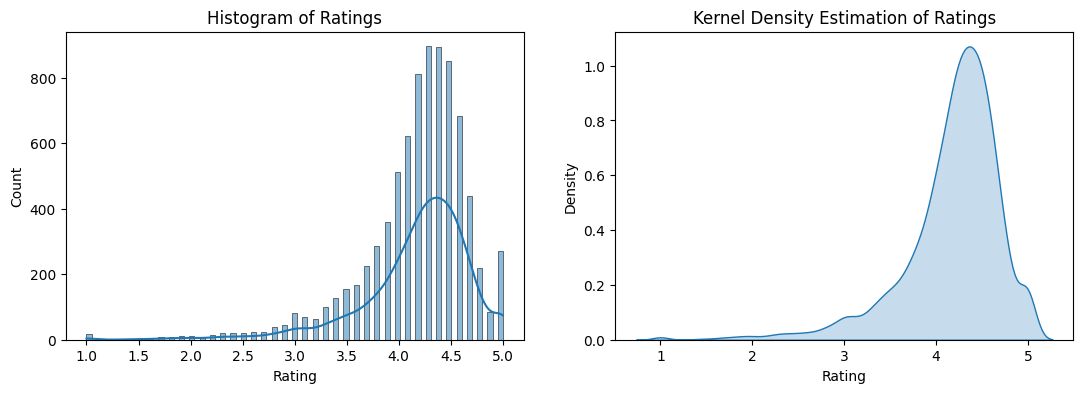

In [ ]:
fig , ax = plt.subplots(1,2 , figsize = (13,4))
sns.histplot(data = result_df , x = "Rating" , kde = True  , ax = ax[0])
ax[0].set_title("Histogram of Ratings")
sns.kdeplot(result_df["Rating"] , fill = True, ax = ax[1])
ax[1].set_title("Kernel Density Estimation of Ratings")
plt.show()

### Insight
Majority of the apps got rating between 4.0 - 4.5 ,
Lowest rating is 1.0

In [ ]:
result_df["log of Reviews"] = result_df["Reviews"].apply(lambda x : np.log10(x))

### G-2 = log of reviews distribution

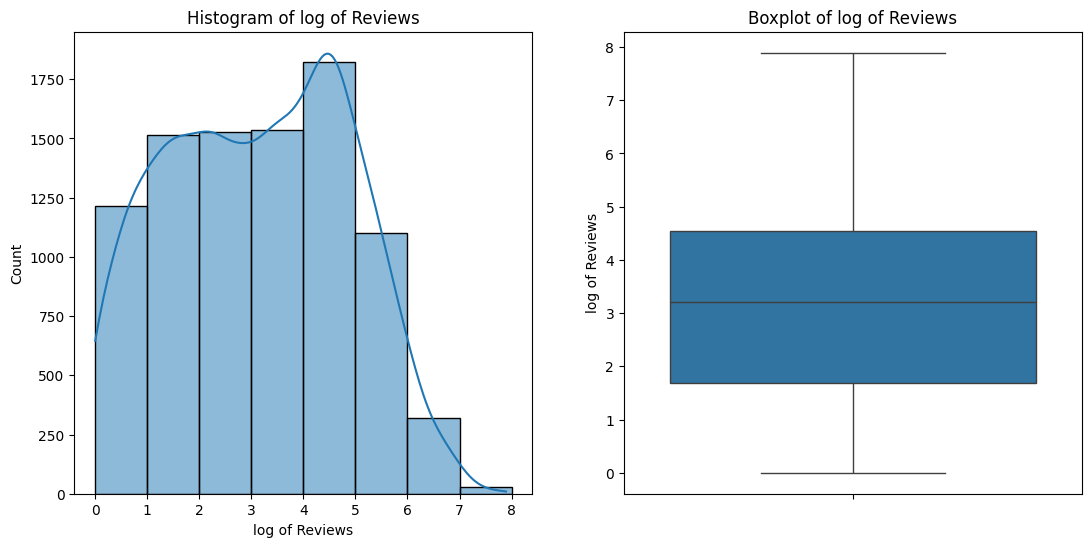

In [ ]:
fig , ax = plt.subplots(1,2 , figsize = (13,6))
sns.histplot(result_df["log of Reviews"] , bins = np.arange(0 , 8.5 , 1) , kde = True , ax = ax[0])
ax[0].set_title("Histogram of log of Reviews")
sns.boxplot(result_df["log of Reviews"] , ax = ax[1])
ax[1].set_title("Boxplot of log of Reviews")
plt.show()

### Insight
Many apps(1500*3 + 1750 = 6250 apps out of 9660 = 64% of apps) got reviews between 10^1 - 10^5 indicating installs of 64% of the apps must be greater than these values

### G-3 = kde and box plot of log of Installs

In [ ]:
result_df["log of Installs"] = result_df["Installs"] .apply(lambda x : np.log10(x))

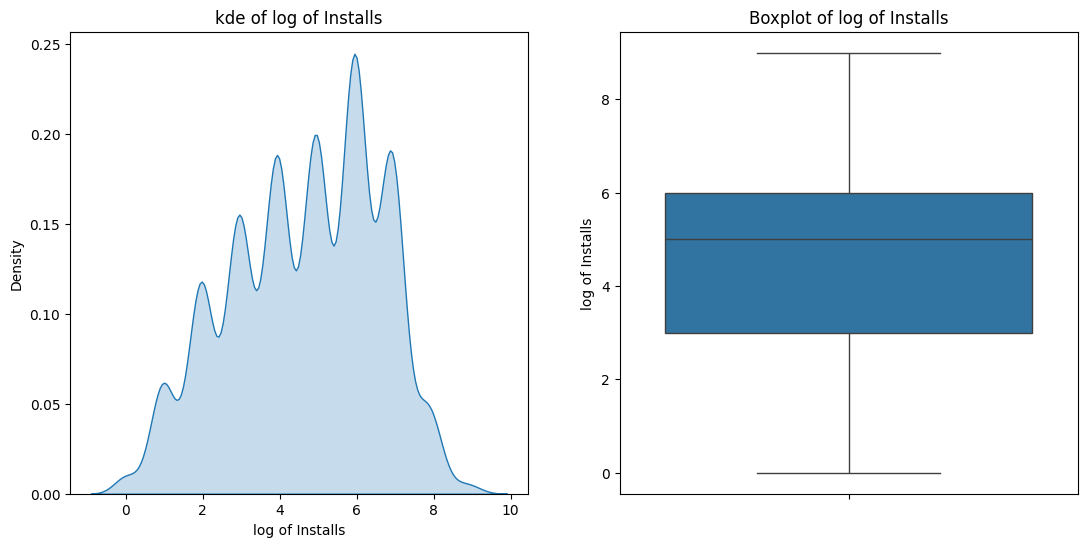

In [ ]:
fig , ax = plt.subplots(1,2 , figsize = (13,6))
sns.kdeplot(result_df["log of Installs"] , fill = True, ax = ax[0])
ax[0].set_title("kde of log of Installs")
sns.boxplot(result_df["log of Installs"], ax = ax[1])
ax[1].set_title("Boxplot of log of Installs")
plt.show()

### Insights
Likelihood of 10^2 installs almost .12
Likelihood of 10^3 installs almost .15
Likelihood of 10^4 installs almost .17
Likelihood of 10^5 installs almost .20
Likelihood of 10^6 installs almost .25

Hence we can see probability of greater num of installs increases till 10^6
and decreases after that and takes a sharp fall after 10^7 indicating thatprobability of num of installs greater than 10^7 is very very low due to the sharp fall indicating likelyhood of most of the apps have installs now a days between 10^3 - 10^6 (as you can clearly see from box plot) will be high therefore indicating market of apps are performing very well, people are consuming apps products.

Hence from above we can assume that chances of an app having installs between 10^3-10^7 is very high comparatively and higher than that is neglegible


### G-4 = Sum of installs in each category

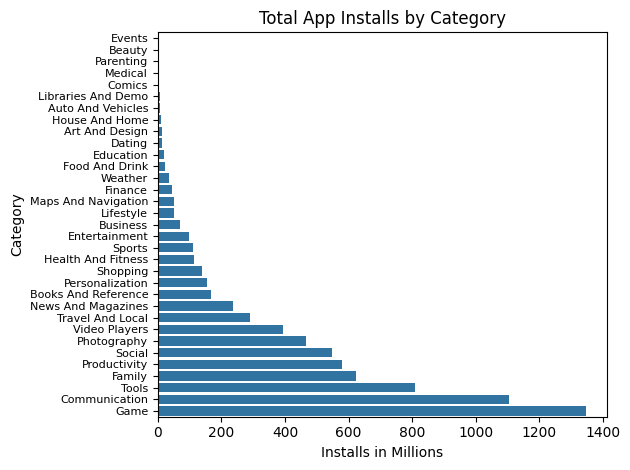

In [ ]:
sns.barplot(y = sorted["Category"]  , x = sorted["Installs"]/10**7)
plt.xlabel("Installs in Ten Millions")
plt.title("Total App Installs by Category")
plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

## Insights
Num of installs is highest for Game category and from graph G-4 we can see num of apps for game is second highest = 946 so we can say although installs is highest the competition is also high and if we see second highest installs category from this graph which is communication category and num of apps of for this category from G-4 graph is 315 which is 1/3rd of game category hence we can say although communication category has second highest the competition is very low hence apps in this category will have continuous flow of revenue for long time due to less competition.
For Family category it is worst scenario high competition and less installs

In [ ]:
result_df.to_csv("final_data.csv")

In [ ]:
n = pd.read_csv("/content/final_data.csv")
n.drop("Unnamed: 0" , axis = 1 , inplace = True)

### G-5 = No.of apps in each category?

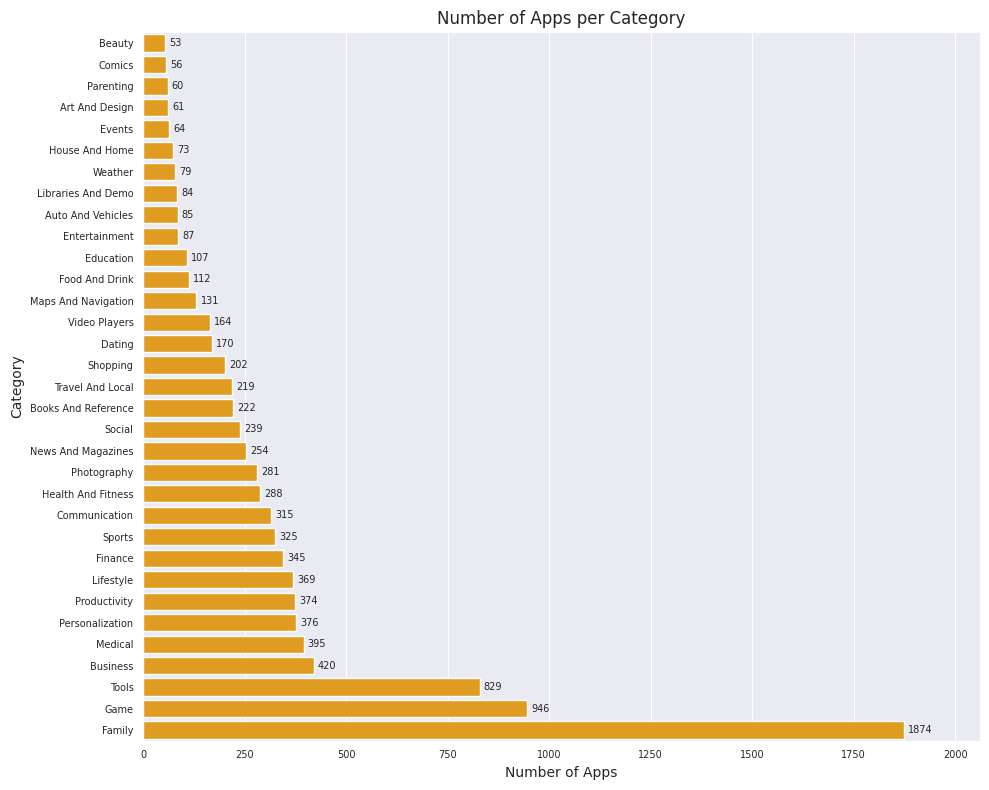

In [ ]:
plt.figure(figsize = (10,8))
sns.set_style("darkgrid")
category_wise_count = n.groupby("Category")["App"].count().reset_index()
category_wise_count = category_wise_count.sort_values(by = "App")
ax = sns.barplot(data = category_wise_count , y = "Category" , x = "App" , color = "orange")
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Number of Apps per Category')
ax.bar_label(ax.containers[0] , padding = 3 , fmt='%.0f', fontsize=7)
ax.margins(x=0.1)
plt.tight_layout()
plt.show()

### Insights
From this graph we can say many apps are made in family categroy , then game snad so on hence competition will be highest in family category then game and so on if the apps are build with intention of earning money , but from graph G-3 we can see that market is healthy for game , then communication and so on.
Hence to earn money it safe to build in that category which have high installs and less apps.

### G-6 = find category with highest rating and which app has highest

In [ ]:
n = pd.read_csv("/content/final_data.csv")
n.drop("Unnamed: 0" , axis = 1 , inplace = True)

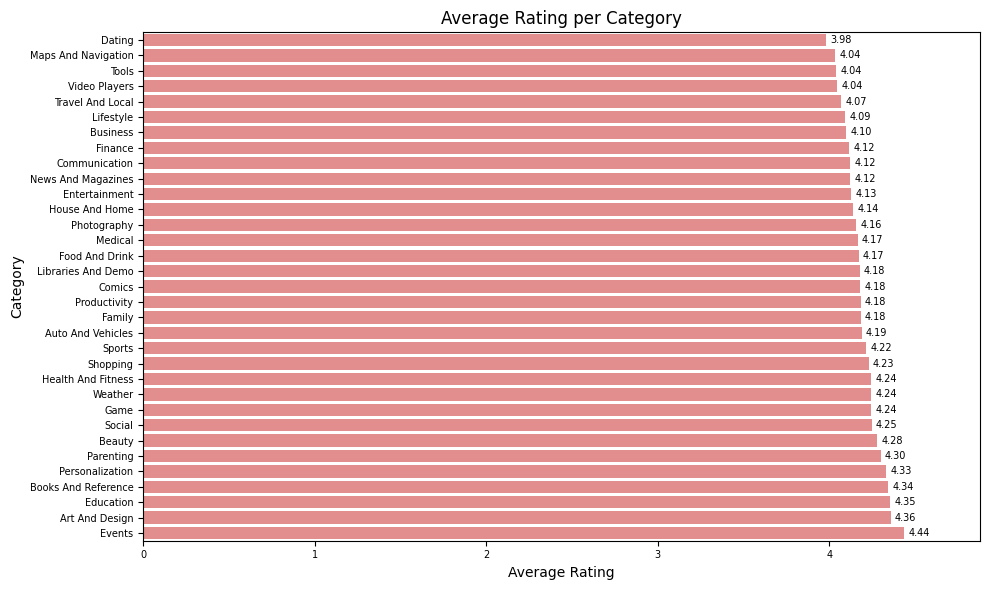

In [ ]:
'''
axes = n.hist("Rating" , by = "Category" ,bins = np.arange(0,5.5,.5) ,  layout = (5,7) , xrot=90 , sharex=False , sharey=True , figsize = (20,20))

for ax in axes.flatten():
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_ylim(bottom=1,top=100)
'''
category_wise_Rating = n.groupby("Category")["Rating"].mean().reset_index().sort_values("Rating")
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=category_wise_Rating.reset_index(), y="Category", x="Rating" , color = "lightcoral")
plt.ylabel("Category")
plt.xlabel("Average Rating")
plt.title("Average Rating per Category")
ax1.bar_label(ax1.containers[0] , padding = 3 , fmt='%.2f', fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
ax1.margins(x=0.1)
plt.tight_layout()
plt.show()


### Insights
From this graph we see that almost all of the categroies have mean rating very close within the difference of .46 with lowest 3.98 and highest 4.44 and if we round off to 1 decimal places we get 4 apps having 4 rating , 8 apps having 4.1 ratings , 11 apps having 4.2 ratings and 6 apps having ratings 4.3 and rest 4.4
Hence we can say that all category's apps have on an average happy users and satisfied with the products.
Hence apps products are treated positively by humans hence we can see why there is so much fast growth in this field.

### G-7 = log_reviews vs log_installs

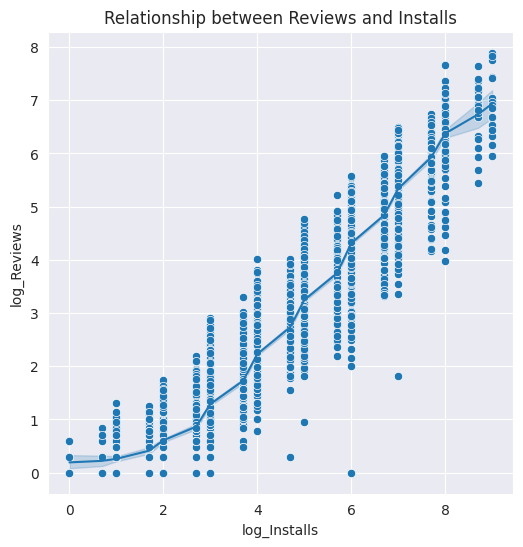

In [ ]:
n["log_Reviews"] = n["Reviews"].apply(lambda x : np.log10(x))
n["log_Installs"] = n["Installs"].apply(lambda x : np.log10(x))
fig, ax1 = plt.subplots(figsize=(6,6))
sns.lineplot(data = n , y = "log_Reviews" , x = "log_Installs" , ax = ax1)
sns.scatterplot(data = n , y = "log_Reviews" , x = "log_Installs" , ax = ax1)
plt.title("Relationship between Reviews and Installs")
plt.xlabel("log_Installs")
plt.ylabel("log_Reviews")
plt.show()


### Insights
I wanted to see how many users will take an effort to give one click review and how many do not and from this we can see a +ve relationship between num of reviews and num of installs and also an approximate straight line .
Hence we can get the value of num of reviews from num of installs

In [ ]:
n["Installs"].value_counts()

Installs
1000000       1417
100000        1113
10000         1030
10000000       937
1000           888
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: count, dtype: int64

### G-8 = Rating vs log_Insatlls

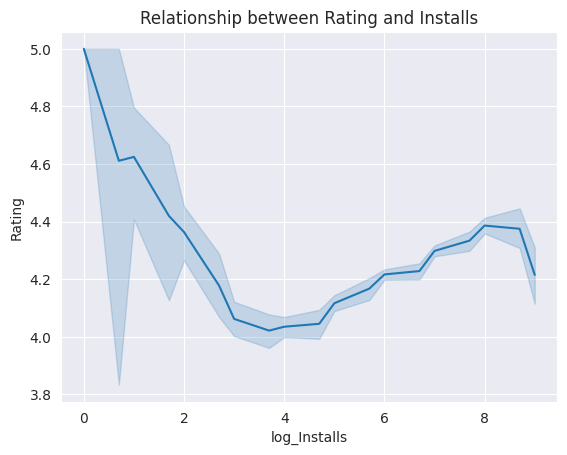

In [ ]:
sns.lineplot(data = n , y = "Rating" , x = "log_Installs")
plt.title("Relationship between Rating and Installs")
plt.xlabel("log_Installs")
plt.ylabel("Rating")
plt.show()

### Insights
As installs increases mean ratings dips but reamins above 4 and then rises up a little hence we can say that on an average ratings are between 4 and 5 which shows good indiaction of user satisfaction with apps which brings us to the same conclusion as above graph G-7. But since this graph shows some clear relationship so we can use machine learning models to predict ratings on basis of installs and same goes with graph G-7

### G-9

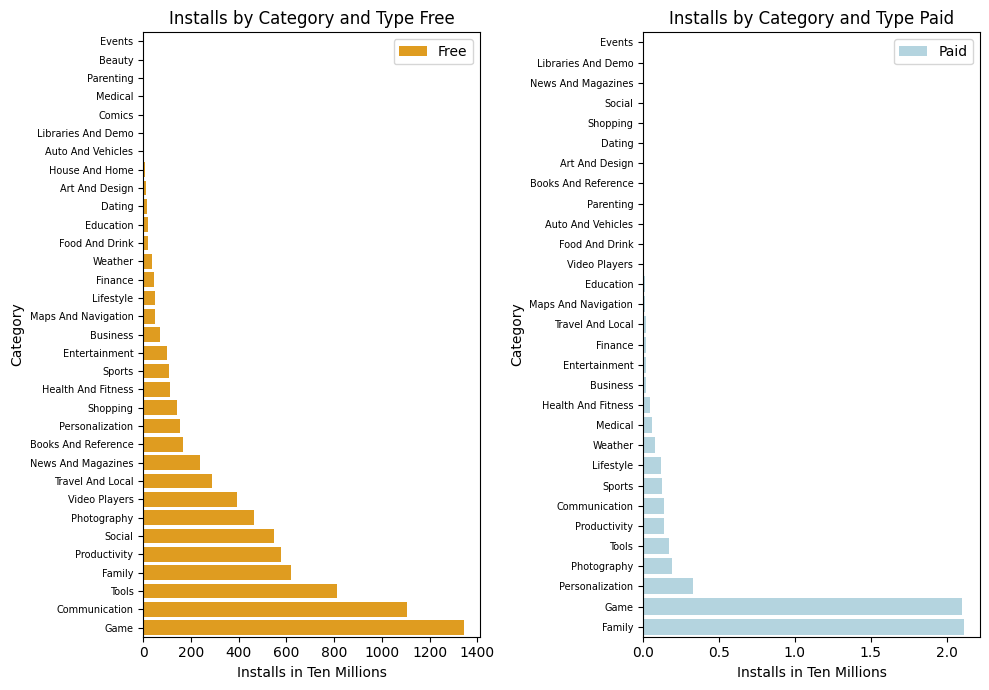

In [ ]:
grouped = n.groupby(['Category', 'Type'])['Installs'].sum().reset_index()
sorted = grouped.sort_values(by='Installs', ascending=False)
sorted["Installs"] = sorted["Installs"]/10**7
free = sorted[sorted["Type"] == "Free"].sort_values(by="Installs")
paid = sorted[sorted["Type"] == "Paid"].sort_values(by="Installs")
fig , ax = plt.subplots(1,2,figsize=(10, 7))
sns.barplot(data = free , y = "Category" , x = "Installs" , color = "orange" , ax = ax[0] , label = "Free")
sns.barplot(data = paid , y = "Category" , x = "Installs" , color = "lightblue" , ax = ax[1] , label = "Paid")
ax[0].set_title("Installs by Category and Type Free")
ax[0].set_ylabel("Category")
ax[0].set_xlabel("Installs in Ten Millions")
ax[0].tick_params(axis = "y" , labelsize = 7)
ax[0].legend()
ax[1].set_title("Installs by Category and Type Paid")
ax[1].set_ylabel("Category")
ax[1].set_xlabel("Installs in Ten Millions")
ax[1].tick_params(axis = "y" , labelsize = 7)
ax[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
paid[paid["Category"] == "Communication"]

,Category,Type,Installs
11,Communication,Paid,0.136005


### Insights
As we can see these graphs displays very clear contrast between num installs for each free and paid in each category.
In gaming - free = 12000 mill vs paid = 20 mill installs
In Communication - free = 1100 mill vs paid = .136 mill (136k)
and so on.

### G-10 = count and distribution by type

<ipython-input-80-a524b0b986ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = n , x = "Type", palette = "Dark2")


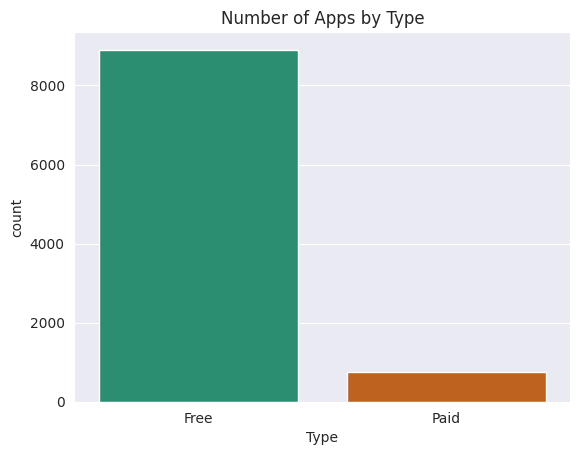

In [ ]:
ax = sns.countplot(data = n , x = "Type", palette = "Dark2")
plt.title("Number of Apps by Type")
plt.show()

### Insights
Here we see that num of free apps is far greater than paid apps

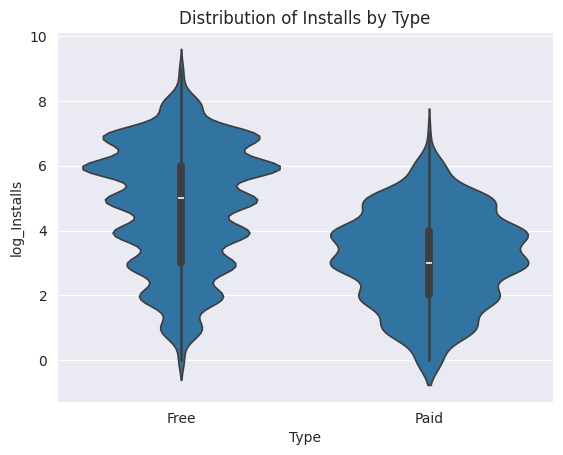

In [ ]:
sns.violinplot(data = n , x = "Type" , y = "log_Installs")
plt.title( "Distribution of Installs by Type")
plt.show()

### Insights
for free type num of installs varies along long range and most installs is between 10^4-10^6 and mx goes till 10^9 but for paid apps it ranges from 0 till 10^8 and most apps have installs between 10^3-10^5 which is very less comapared to free type which shows very clear contrast.

### G-11 Sum of installs by type

In [ ]:
n["log_Installs"] = n["Installs"].apply(lambda x : np.log10(x))

In [ ]:
grouped = n.groupby(['Type'])['Installs'].sum().reset_index()

In [ ]:
grouped["log_Installs"] = grouped["Installs"].apply(lambda x : np.log10(x))

In [ ]:
grouped

,Type,Installs,log_Installs
0,Free,75265163646,10.876594
1,Paid,57363781,7.758638


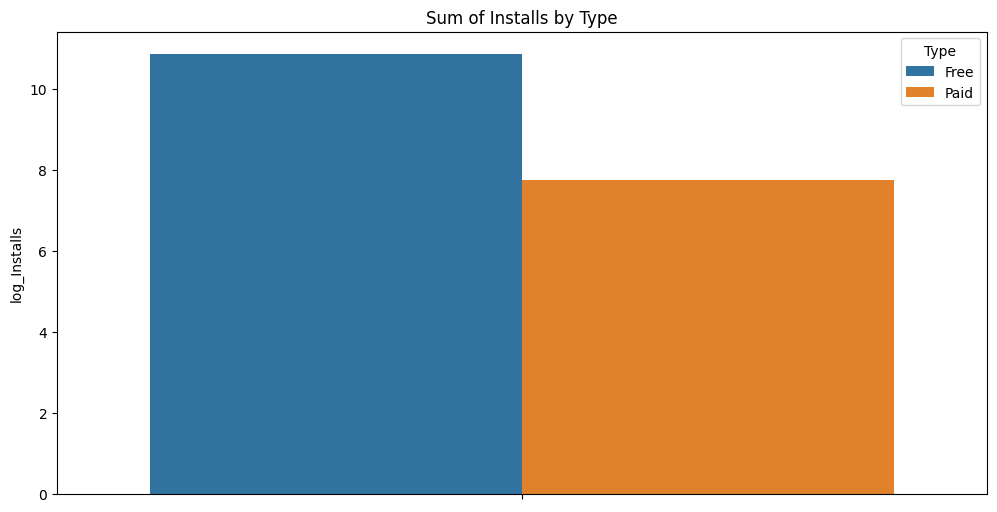

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data = grouped , y = "Installs" , hue = "Type" , ax = ax1 , palette = "tab10")
plt.ylabel("log_Installs")
plt.title( "Sum of Installs by Type")
plt.show()

### Insights
This graph shows that installs of free type is 1000 times greater than paid type

### G-12 = boxplot of log of installs by type

In [ ]:
n["log_Installs"] = n["Installs"].apply(lambda x : np.log10(x))

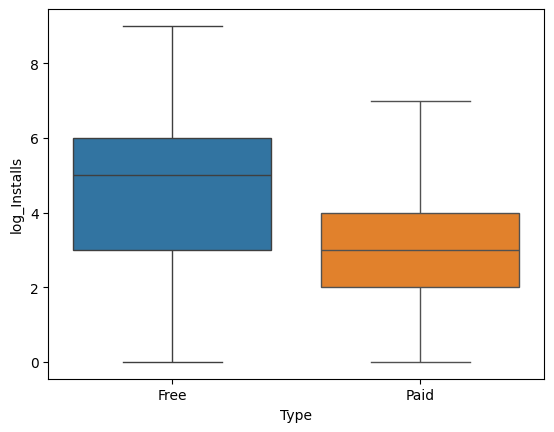

In [ ]:
fig , ax1 = plt.subplots()
for value in n["Type"].unique():
  n_df = n[n["Type"] == value]
  sns.boxplot(data = n_df , x = "Type" , y = n_df["log_Installs"] , ax = ax1)

### Insights
This box plot shows that majority of the installs lie between 10^3-10^6 for free and for paid it lies between 10^2-10^4 which is much lower

### G-13 = paid type price violin,box,sum=barplot,histplot

<Axes: xlabel='Price', ylabel='Count'>

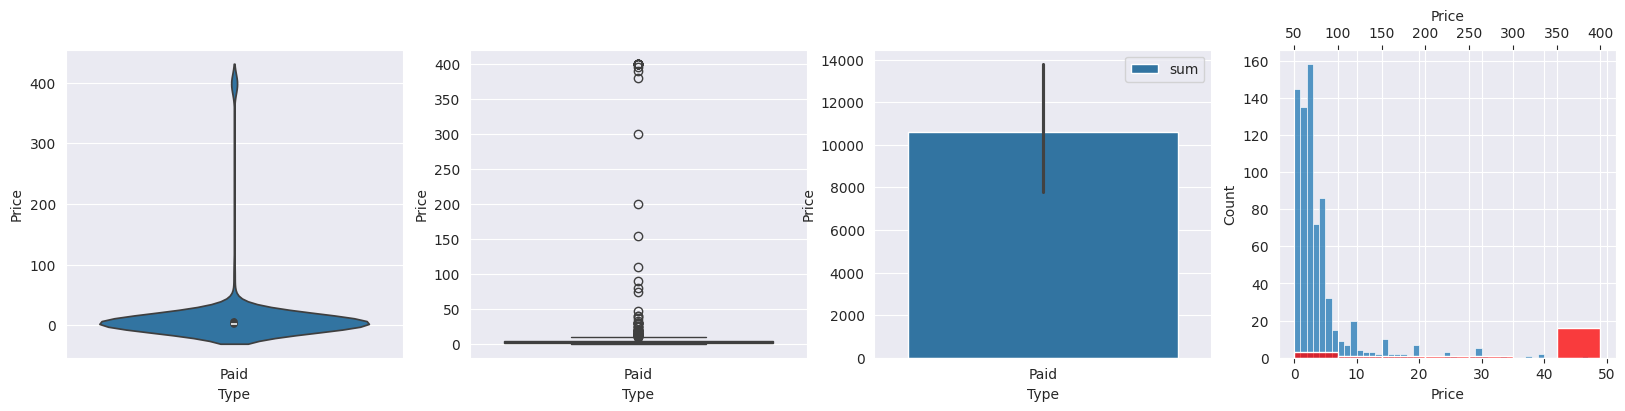

In [ ]:
fig , ax = plt.subplots(1,2 , figsize =(20,4))
n_df = n[n["Type"] == "Paid"]
sns.violinplot(data = n_df , x = "Type" , y = n_df["Price"] , ax = ax[0])
sns.boxplot(data = n_df , x = "Type" , y = n_df["Price"] , ax = ax[1])
plt.show()

In [ ]:
n["Price"].sum()

10598.150000000001

### Insights
In this I am trying to analyse price column
1. first is violin which shows how prices are distributed - majority of the prices are between 0.99 and 2.99 dollors and varies very widely till 400$

2. second is boxplot which shows many outliers in price column and many of the prices are concentrated in a very narrow region

3. third is barplot which simply shows the total sum of prices

From all th above graph we conclude that prices varie very widely and most of the paid apps prices are very low and those of high are very less.

### G-15 = Category wise boxplot og log of price and distribtion of price

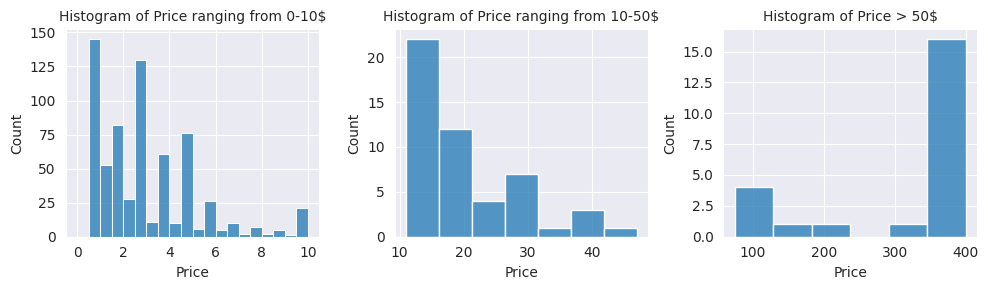

In [ ]:
fig , ax = plt.subplots(1,3 , figsize = (10,3))
small = n_df[n_df["Price"] <= 10 ]
sns.histplot(data = small , x = small["Price"] , ax = ax[0] , bins = np.arange(0,10.5,.5))
ax[0].set_title("Histogram of Price ranging from 0-10$" , fontsize = 10)
medium = n_df[(n_df["Price"] > 10) & (n_df["Price"] <= 50) ]
sns.histplot(data = medium , x = medium["Price"] , ax = ax[1])
ax[1].set_title("Histogram of Price ranging from 10-50$" , fontsize = 10)
high = n_df[n_df["Price"] > 50 ]
sns.histplot(data = high , x = high["Price"] , ax = ax[2])
ax[2].set_title("Histogram of Price > 50$" , fontsize = 10)
plt.tight_layout()
plt.show()

### Insights
This histplot of price is divides into 3 graph
1. shows the distribution of small prices (0-10) - as can be seen as  the m=prices increases number of apps decreases and most of the paid apps are between 0-2$

2. shows the distribution of medium prices(10-50) - here also same trend and the prices above 10$ are the outliers whcih we were seeing in boxplot

3. shows the distribution of high prices(>50$)  - here we can see 400$ priced app is more than 100 and subsequent prices which is surprising as this graph should have also followed same trend as above graphs

From the above graphs it can be seen that althogth these are paid apps the num of apps in low prices is very large compared to medium and high prices , hence we can say that apps are not used as a product but as a tool to increases productivity of a company as revenue generated by this much price will very less.

### G-16

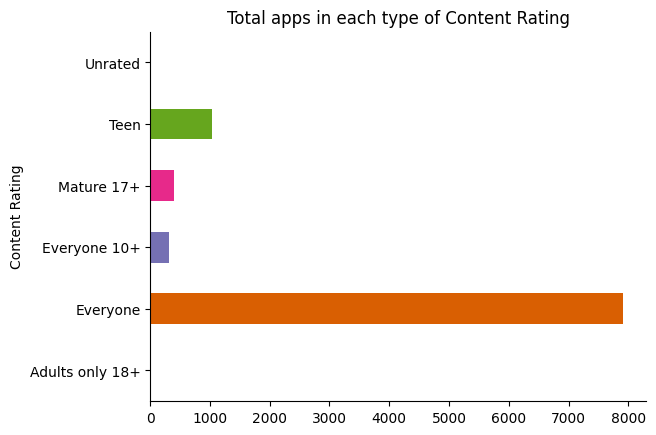

In [ ]:
# @title Content Rating

n.groupby('Content Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title(f'Total apps in each type of Content Rating')
plt.show()

### Insights
This graph shows total apps in each content ratings and show high for Everyone and low for Everyon 10+ and negligble for (Unrated and Adults only) content rating . The above graph makes sense as major categories lies in Everyone group

## G-17

<Axes: xlabel='log_Installs', ylabel='Content Rating'>

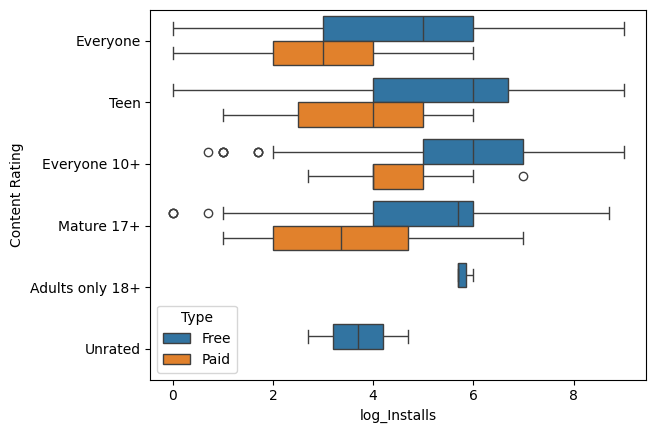

In [ ]:
sns.boxplot(data = n ,  x = "log_Installs" ,  y = "Content Rating" , hue = "Type")

### Insights
It is suprpising to see Teen category have as many installs as Everyone even though number of apps are very less which means teens users are very high than any other content rating group

## G-18

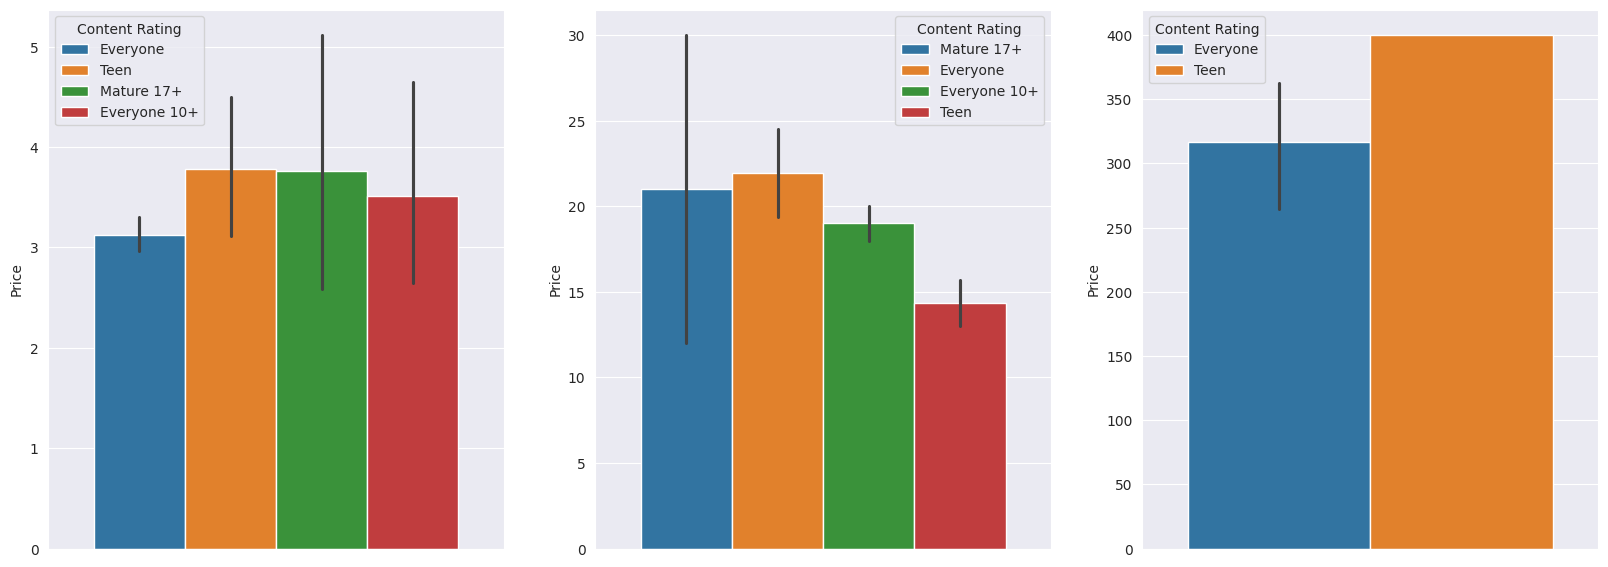

In [ ]:
fig , ax = plt.subplots(1,3 , figsize = (20,7))
small = n_df[n_df["Price"] <= 10 ]
sns.barplot(data = small ,  y = "Price" ,  hue = "Content Rating" , ax = ax[0])
medium = n_df[(n_df["Price"] > 10) & (n_df["Price"] <= 50) ]
sns.barplot(data = medium ,  y = "Price" ,  hue = "Content Rating" , ax = ax[1])
high = n_df[n_df["Price"] > 50 ]
sns.barplot(data = high ,  y = "Price" ,  hue = "Content Rating" , ax = ax[2])
plt.show()

### Insights
This graph shows the prices by content rating
1. low prices have Teen group highest and lowest Everyone
2. Medium prices have Everyone and Mature group highest
3. High only contains Everyone and Teen group and average prices goes till 300-400 dollars

Hence in low and high prices dominant are Everyone and Teen and in medium prices dominant is mature and everyone group apps

## G-19

In [ ]:
df_r = pd.read_csv("/content/User Reviews.csv")

In [ ]:
df_r.dropna(inplace = True)

In [ ]:
grouped = df_r.groupby(['App' , 'Sentiment']).count().reset_index()
grouped.drop(['Sentiment_Polarity' , 'Sentiment_Subjectivity'] ,axis = 1 , inplace = True)
grouped.columns = ["App" , "Sentiment" , "Count"]

In [ ]:
grouped

,App,Sentiment,Count
0,10 Best Foods for You,Negative,10
1,10 Best Foods for You,Neutral,22
2,10 Best Foods for You,Positive,162
3,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Negative,1
4,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Neutral,8
...,...,...,...
1287,Disney Magic Kingdoms: Build Your Own Magical ...,Negative,16
1288,Disney Magic Kingdoms: Build Your Own Magical ...,Positive,31
1289,DisneyNOW – TV Shows & Games,Negative,9
1290,DisneyNOW – TV Shows & Games,Neutral,2


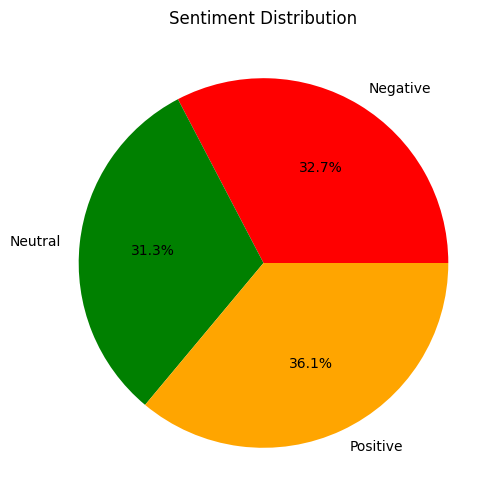

In [ ]:
sentiment = grouped.groupby(["Sentiment"]).count().reset_index()
sentiment.drop('App' , axis = 1, inplace = True)
plt.figure(figsize=(8, 6))
plt.pie(sentiment["Count"],labels = ['Negative' ,'Neutral' , 'Positive'], autopct='%1.1f%%', colors=['red', 'green', 'orange'])
plt.title('Sentiment Distribution')

# Display the chart
plt.show()

### Insights
Out of 9960 apps 343 apps got reviews in User_Review csv file and among those apps num of neutral,negative and positive reviews were almost similar even though positives reviews were highest but it was only high by small margin. Hence it shows that apps performance and user satisfaction are not that good.